<b>#-----------------------------------------Cardio Vascular Disease Prediction-----------------------------------------------#</b>

In [1]:
# This dataset was created by combining different datasets already available independently but not combined before. 
# In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes. 
# Source : https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction
# Cleveland: 303 observations
# Hungarian: 294 observations
# Switzerland: 123 observations
# Long Beach VA: 200 observations
# Stalog (Heart) Data Set: 270 observations
# Final dataset: 918 observations ( Curated)

In [2]:
# Age: age of the patient [years]
# Sex: sex of the patient [M: Male, F: Female]
# ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
# RestingBP: resting blood pressure [mm Hg]
# Cholesterol: serum cholesterol [mm/dl] - Total Cholestorol 
# FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
# RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
# MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
# ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
# Oldpeak: oldpeak = ST [Numeric value measured in depression]
# ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
# HeartDisease: output class [1: heart disease, 0: Normal]

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,ConfusionMatrixDisplay,precision_score,recall_score,f1_score,classification_report,roc_curve,plot_roc_curve,auc,precision_recall_curve,plot_precision_recall_curve,average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

from sklearn.feature_selection import SelectKBest, f_classif

from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

In [4]:
# Init : Variables
now = datetime.now() # current date and time

<b>##################################################Data Collection & Loading#########################################################</b>

In [5]:
#https://raw.githubusercontent.com/sharmaroshan/Heart-UCI-Dataset/master/heart.csv
# Descriptive Statistics - 
# 1. Central Tendency (mean, mode, median)
# 2. Measures of Variability (range, interquartile range)
# 3. Variance and Standard Deviation 
# count : Count is same for all feautures , so no null values. 
df = pd.read_csv('datasources/heartdisease_combined.csv')
df.describe() # this includes only summary statistics of numeric varabiles 

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
# Summary Statistics of Strings
df.describe(include = [object])

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


In [7]:
#generates detail data profile 
# from pandas_profiling import ProfileReport

# profile = ProfileReport(df, explorative=True, minimal=False)
# try:
#    profile.to_widgets()         # view as widget in Notebook
# except:
#    profile.to_notebook_iframe() # view as html iframe in Notebook
# profile.to_file('data.html')    # save as html file

<b>##################################################Data Visualization#########################################################</b>

In [8]:
# Peek Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


05/29/2023, 11:25:21


<Figure size 800x550 with 0 Axes>

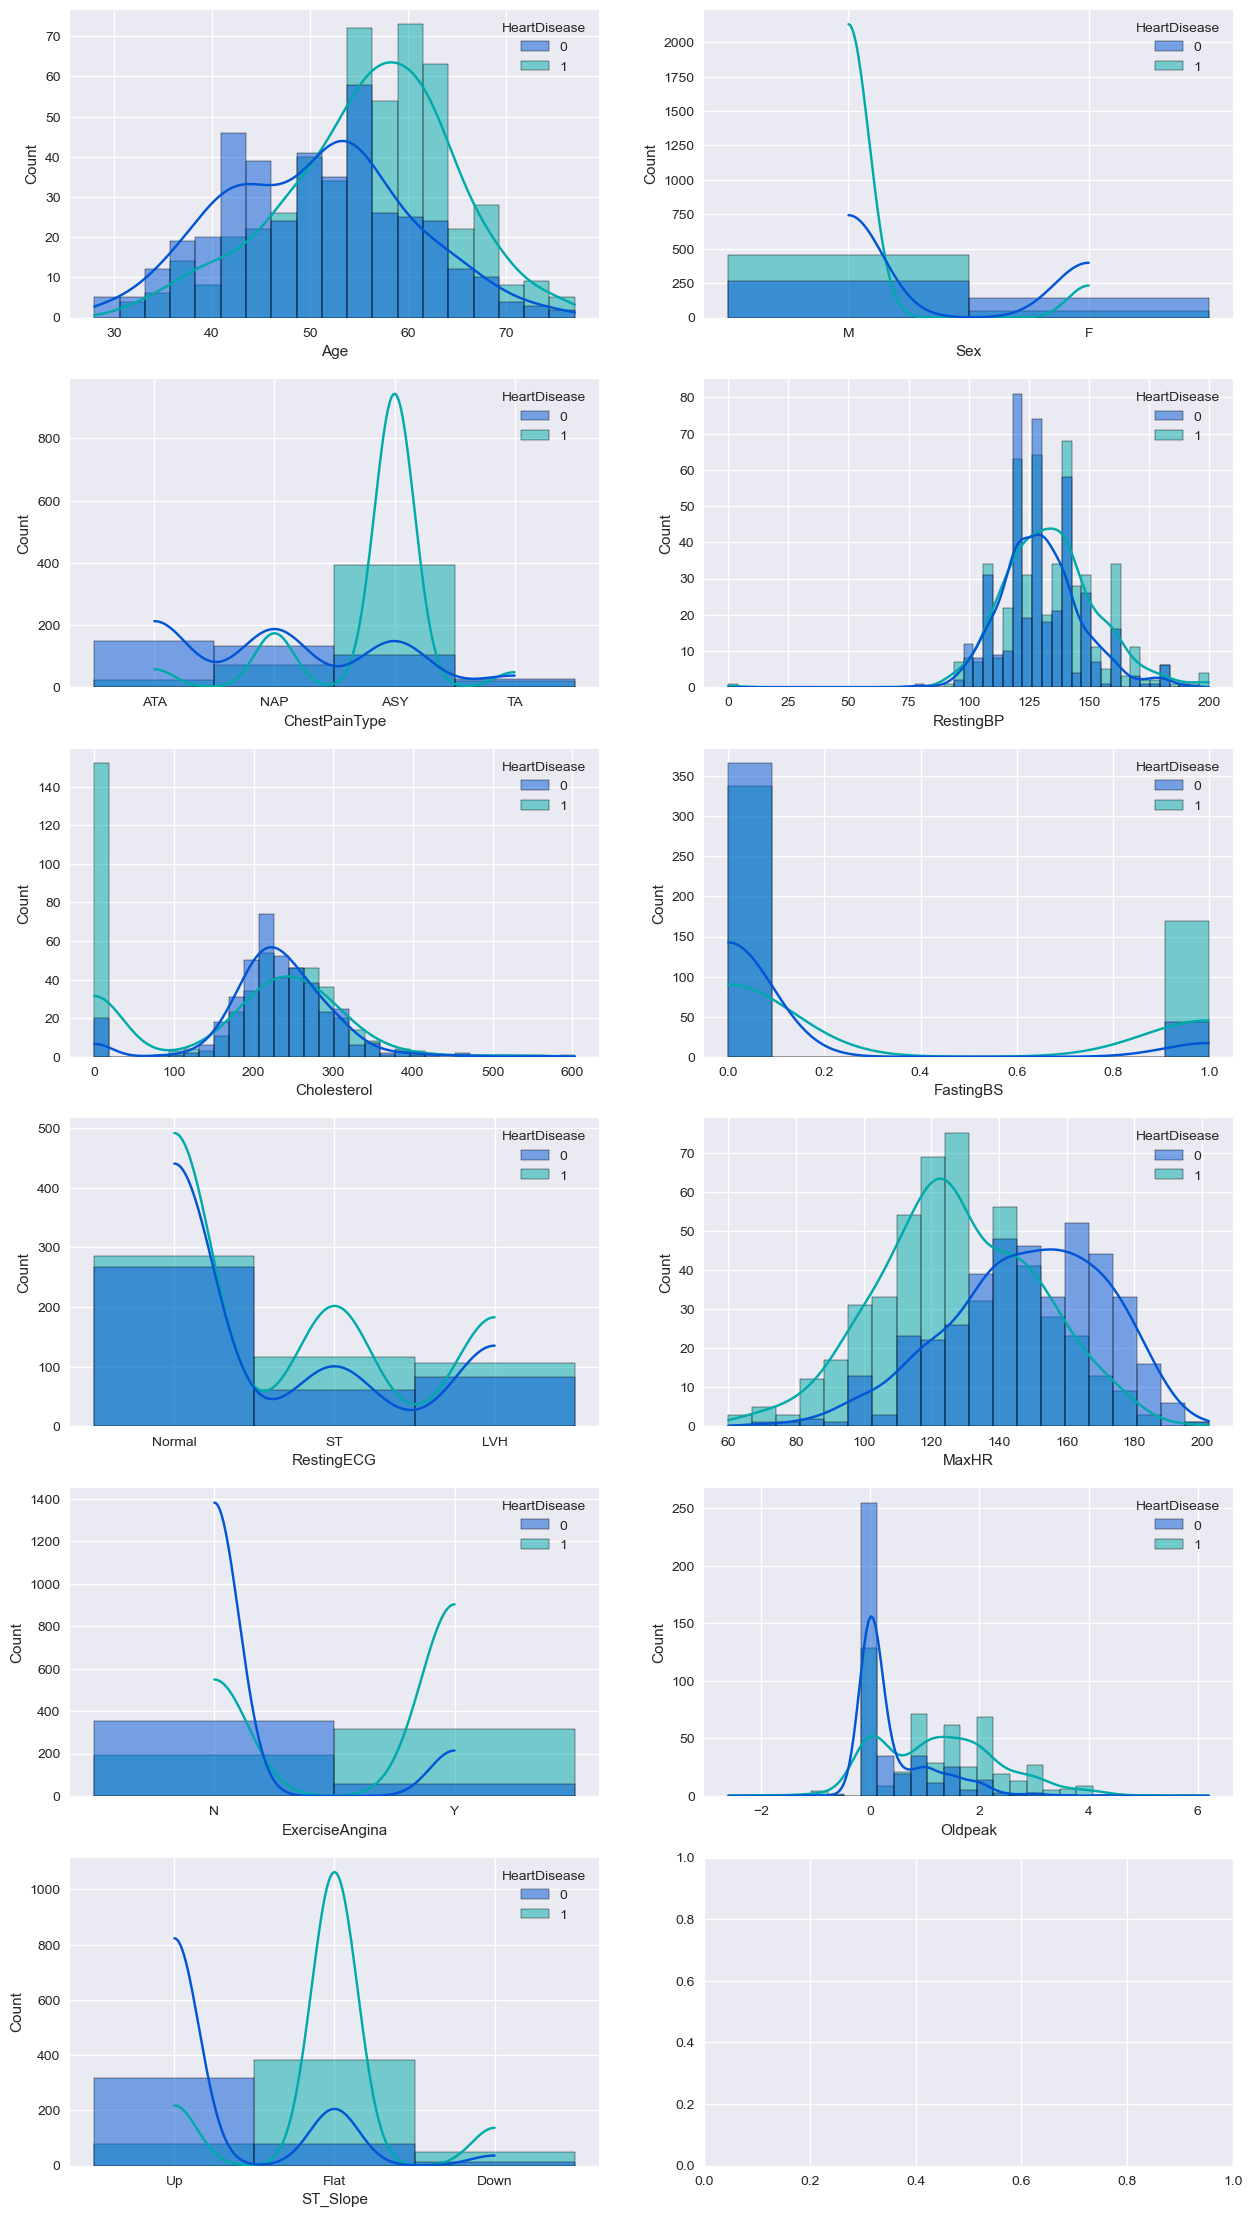

In [9]:
# Inference 
# 1. Age: We see how the risk of suffering cardiovascular diseases (CVDs) increases with age.
# 2. Sex : Apparently men have a major risk of suffering CVD's 
# 3. ChestPainType: The majority cases of CVDs present absence of chest pain or the usual anginal equivalents. Followed by the cases that present chest pain non-anginal.
# 4. RestingBP: the high blood pressure can drive to suffering CVDs. We see in this histogram a slight increase in the CVDs cases when increase the resting blood pressure. 
# 5. Cholesterol: a high level of cholesterol can lead to stroke, heart attack, or even heart failure
#    Three cholesterol types that compose a serum cholesterol, HDL or 'good' cholesterol, LDL or 'bad' cholesterol and triglycerides(TG), 
#    Where high HDL levels are better than high LDL and TG levels
#    A serum cholesterol major than 200 mm/dl is considered a risk factor for health
# 6. FastingBS:high blood sugar can damage blood vessels and the nerves that control your heart. majority of patients with high blood sugar have CVDs
# 7. RestingECG : The majority cases of patients with CVDs present normal resting electrocardiograms, 
#    We observe that in the cases that present ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) 
#    the amount of patients with CVDs are two times more than patients that not suffering CVDs, 
# 8. MaxHR : Patients with CVDs present low values of maximum heart rate, while that patients with normal conditions present values more high
# 9. ExerciseAngina :  Angina is chest pain or discomfort caused when your heart muscle doesn't get enough oxygen-rich blood. 
#    majority of patients with CVDs present exercise-induced angina
current_date_time = now.strftime("%m/%d/%Y, %H:%M:%S")

plt.style.use("seaborn")
plt.subplots_adjust(hspace=0.2)
color = 'winter'

# Print Current DateTime
current_date_time = now.strftime("%m/%d/%Y, %H:%M:%S")
print(current_date_time) 

#fig, axs = plt.subplots(6, 2, figsize=(15,28))
fig, axs = plt.subplots(6, 2, figsize=(15,28))
i=1
for feature in df.columns:
    if feature not in ["HeartDisease"] and i < 14:
        plt.subplot(6,2,i)
        sns.histplot(data=df, x=feature, kde=True, palette=color, hue='HeartDisease')
        i+=1

<b>##################################################Data Cleaning#########################################################</b>

<b>-------------------------------------Identify Missing Values / Fix Missing Values ----------------------</b>

In [10]:
numeric_vars = df.columns[df.dtypes != 'object']
categorical_vars = df.columns[df.dtypes == 'object']
# List out columns and their counts of missing values - sorted 
print('--------------Numerical Counts of Missing Values ( Sorted ) --------------------')
print(df[numeric_vars].isnull().sum().sort_values(ascending=False))

print('--------------Categorical Counts of Missing Values --------------------')
print(df[categorical_vars].isnull().sum().sort_values(ascending=False))

--------------Numerical Counts of Missing Values ( Sorted ) --------------------
Age             0
RestingBP       0
Cholesterol     0
FastingBS       0
MaxHR           0
Oldpeak         0
HeartDisease    0
dtype: int64
--------------Categorical Counts of Missing Values --------------------
Sex               0
ChestPainType     0
RestingECG        0
ExerciseAngina    0
ST_Slope          0
dtype: int64


<b>------------------------------ Check Data Quality ---------------------------------</b>

In [11]:
# Check for Imbalanced Data
hdve = ( (df['HeartDisease'] == 1).sum() / df.HeartDisease.value_counts().sum() ) * 100
hdve

55.33769063180828

In [12]:
hdve = ( (df['HeartDisease'] == 0).sum() / df.HeartDisease.value_counts().sum() ) * 100
hdve

44.66230936819172

In [13]:
for col in categorical_vars:
    print( "-------------- {0}------------------------".format(col))
    print(df[col].unique())

-------------- Sex------------------------
['M' 'F']
-------------- ChestPainType------------------------
['ATA' 'NAP' 'ASY' 'TA']
-------------- RestingECG------------------------
['Normal' 'ST' 'LVH']
-------------- ExerciseAngina------------------------
['N' 'Y']
-------------- ST_Slope------------------------
['Up' 'Flat' 'Down']


<b>------------------------Identify and Remove Outliers---------------------------------------</b>

In [14]:
#features like cholesterol and resting blood pressure present atypical cases
def detect_outliers(label=None):
    #The interquartile range (IQR) measures the spread of the middle half of your data. It is the range for the middle 50% of your sample
    Q1 = df[label].quantile(0.25)
    Q3 = df[label].quantile(0.75)
    IQR = Q3 - Q1
    interval = ((df[label] > Q1 - 1.5*IQR) & (df[label] < Q3 + 1.5*IQR))
    return df[interval], df[~interval]

def delete_outliers(df_out):
    return df.drop(df_out.index)

<AxesSubplot:xlabel='Cholesterol'>

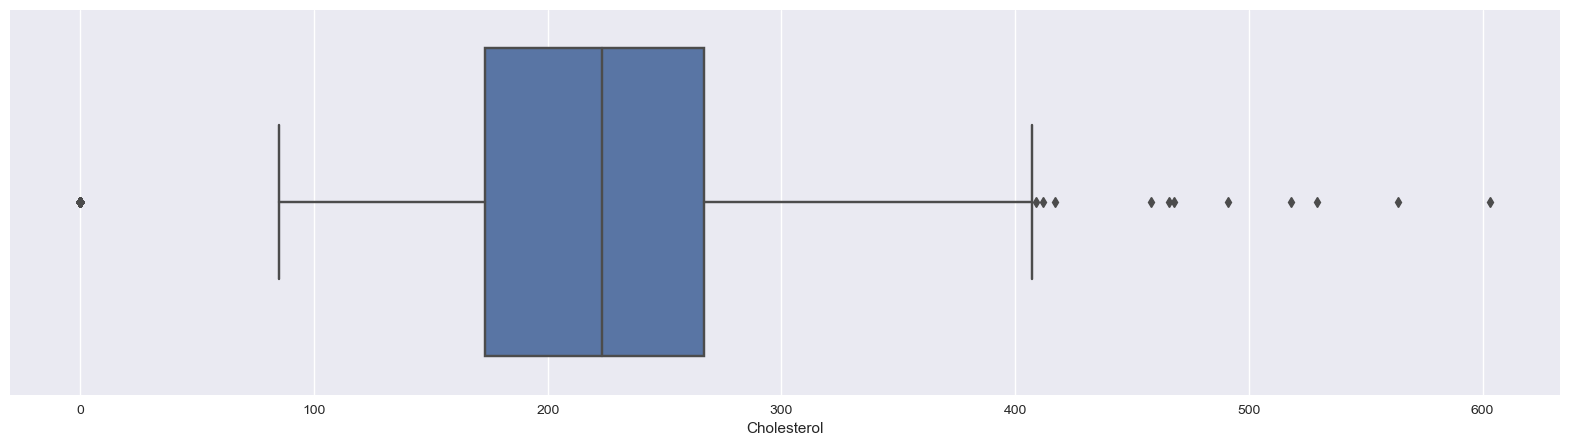

In [15]:
#Cholestrol outliers
plt.figure(figsize=(20,5))
sns.boxplot(data=df, x="Cholesterol")

In [16]:
# Delete Outliers
not_outliers_chol, outliers_chol = detect_outliers('Cholesterol')
print(f'Outliers in cholesterol represent the {round((outliers_chol.shape[0]*100)/df.shape[0], 2)}% of our dataset')
outliers_chol

Outliers in cholesterol represent the 19.93% of our dataset


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
28,53,F,ATA,113,468,0,Normal,127,N,0.0,Up,0
30,53,M,NAP,145,518,0,Normal,130,N,0.0,Flat,1
69,44,M,ASY,150,412,0,Normal,170,N,0.0,Up,0
76,32,M,ASY,118,529,0,Normal,130,N,0.0,Flat,1
103,40,M,ASY,120,466,1,Normal,152,Y,1.0,Flat,1
...,...,...,...,...,...,...,...,...,...,...,...,...
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1
536,62,M,NAP,133,0,1,ST,119,Y,1.2,Flat,1
616,67,F,NAP,115,564,0,LVH,160,N,1.6,Flat,0
667,65,F,NAP,140,417,1,LVH,157,N,0.8,Up,0


In [17]:
# Delete Outliers - Cholestrol with 19.93% 0 Values
df = delete_outliers(outliers_chol[outliers_chol["Cholesterol"] == 0])

<AxesSubplot:xlabel='Cholesterol', ylabel='Count'>

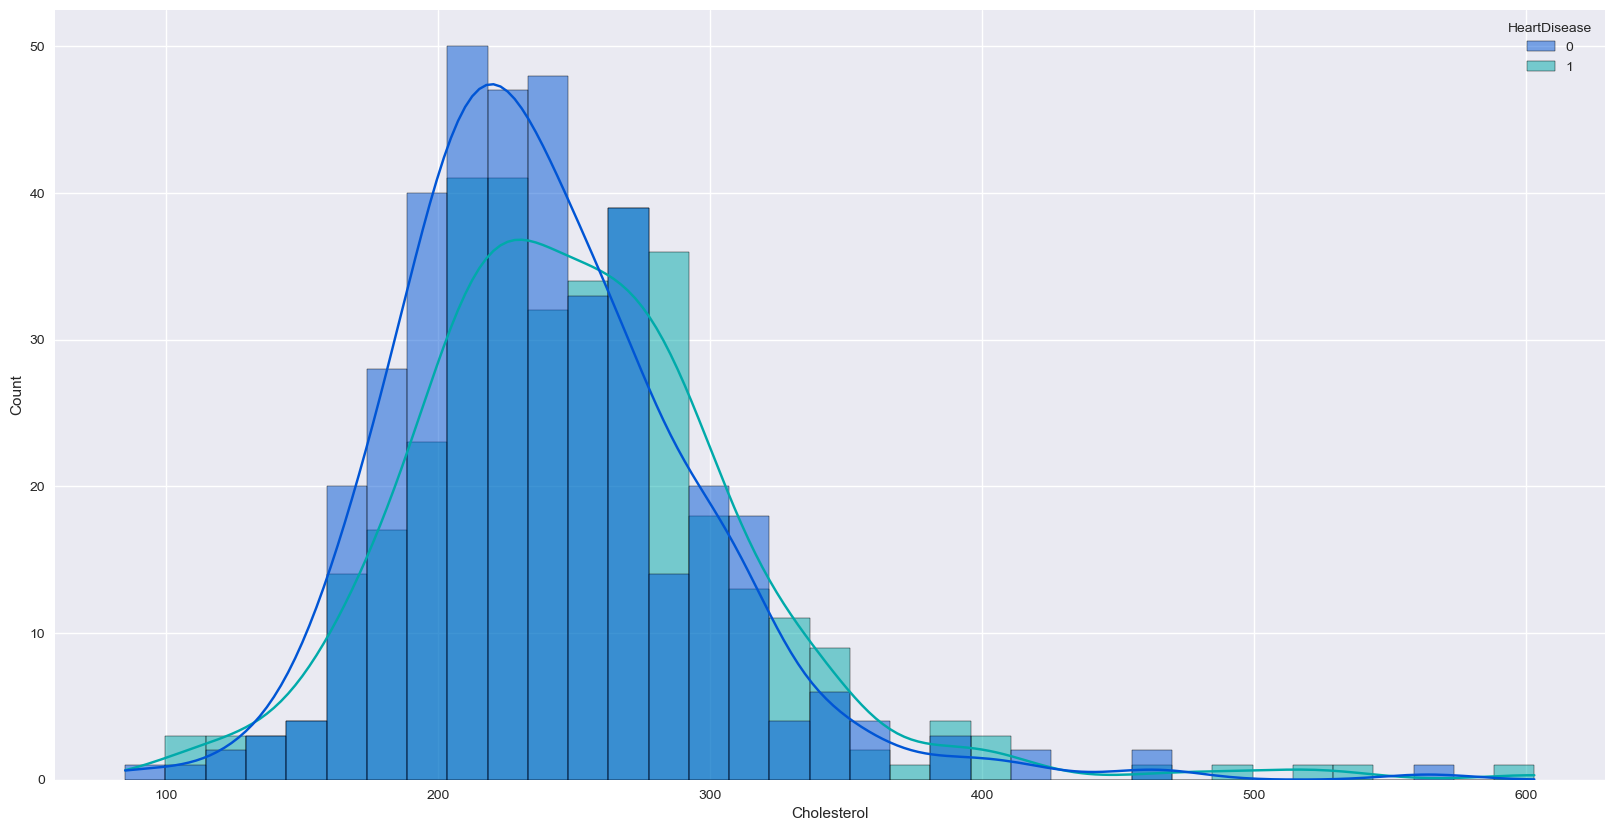

In [18]:
# Visualize Cholestrol for outliers
plt.figure(figsize=(20,10))
sns.histplot(data=df, x='Cholesterol', kde=True, palette=color, hue='HeartDisease')

#Todo : To check if Cholestrol Means have to be assigned

In [19]:
# Detect  - Resting BP Outliers 
not_outliers_rbp, outliers_rbp = detect_outliers('RestingBP')
print(f'Outliers in resting blood pressure represent the {round((outliers_rbp.shape[0]*100)/df.shape[0], 2)}% of our dataset')
outliers_rbp

Outliers in resting blood pressure represent the 4.29% of our dataset


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
86,65,M,ASY,170,263,1,Normal,112,Y,2.0,Flat,1
109,39,M,ATA,190,241,0,Normal,106,N,0.0,Up,0
123,58,F,ATA,180,393,0,Normal,110,Y,1.0,Flat,1
132,56,M,ASY,170,388,0,ST,122,Y,2.0,Flat,1
189,53,M,ASY,180,285,0,ST,120,Y,1.5,Flat,1
190,46,M,ASY,180,280,0,ST,120,N,0.0,Up,0
191,50,M,ATA,170,209,0,ST,116,N,0.0,Up,0
215,30,F,TA,170,237,0,ST,170,N,0.0,Up,0
241,54,M,ASY,200,198,0,Normal,142,Y,2.0,Flat,1
274,45,F,ATA,180,295,0,Normal,180,N,0.0,Up,0


<AxesSubplot:xlabel='RestingBP', ylabel='Count'>

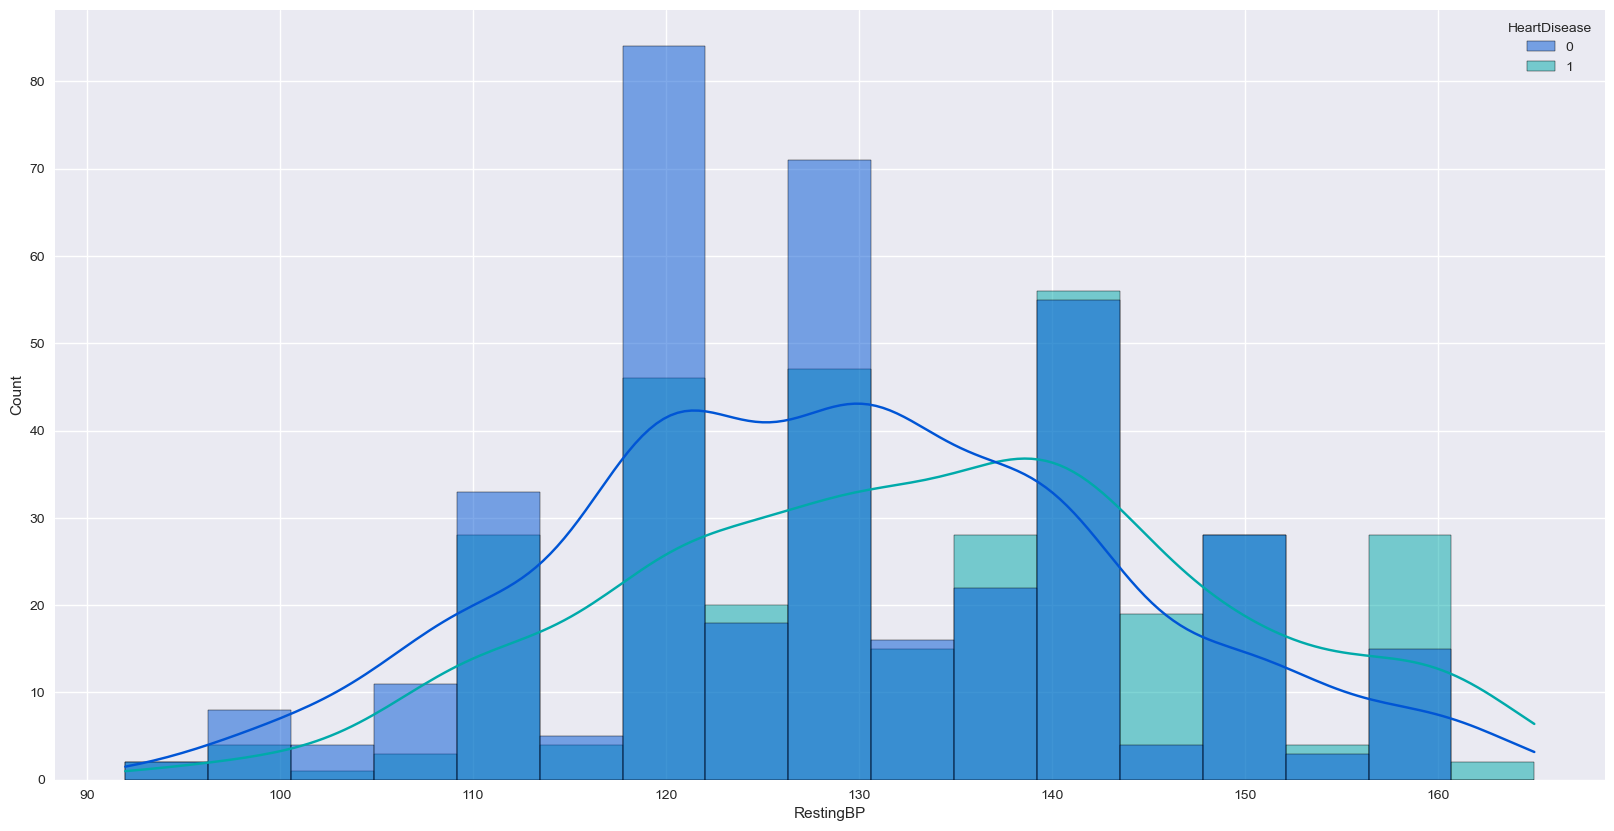

In [20]:
# cleanup - Resting BP Outliers
df = delete_outliers(outliers_rbp)
plt.figure(figsize=(20,10))
sns.histplot(data=df, x='RestingBP', kde=True, palette=color, hue='HeartDisease')

<b>---------------------Delete any Values -----------------------</b>

In [21]:
# No Data to Delete, Update or Impute

<b>---------------------Impute any Missing Values -----------------------</b>

In [22]:
# No Missing Values. 

<b>##################################################Data Reduction#########################################################</b>

In [23]:
# Remove Non Critical Colummsn
# Remove Columns wiht Lower Correlations

<b>##################################################Data Transformation#########################################################</b>

<b>--------------------------Variable Separation-----------------------------</b>

In [24]:
continuos_features = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]
categorical_features = ["ChestPainType", "RestingECG", "ST_Slope"]
binaries_features = ["Sex", "FastingBS", "ExerciseAngina"]

<b>--------------------------------Encoding ( Binary Features )----------------------------------</b>

In [25]:
# Why Feature Encoding : Machine learning models can only work with numerical values. For this reason, it is necessary to transform the categorical values of the relevant features into numerical ones. T
# Binary features enconding
df["Sex"] = df["Sex"].map({'M':1, 'F':0})
df["ExerciseAngina"] = df["ExerciseAngina"].map({'N':0, 'Y':1})
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,0,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,0,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,0,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,108,1,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,0,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,TA,110,264,0,Normal,132,0,1.2,Flat,1
914,68,1,ASY,144,193,1,Normal,141,0,3.4,Flat,1
915,57,1,ASY,130,131,0,Normal,115,1,1.2,Flat,1
916,57,0,ATA,130,236,0,LVH,174,0,0.0,Flat,1


<b>--------------------------------------Data Binning-------------------------------------</b>

In [26]:
# Data binning (or bucketing) groups data in bins (or buckets), in the sense that it replaces values contained into a small interval with a single representative value for that interval. 
# Data Binning is of two types :  Distance and Frequency. We have used Data Binning by Frequency  
# Sometimes binning improves accuracy in predictive models.
df_bin = df.copy()
df_bin_ref = df.copy()
df_bins = pd.DataFrame(columns=['feature', 'bin', 'freq'])
for feature in continuos_features:
    bins = 5
    t = pd.cut(df[feature], bins=bins, labels=range(bins)).astype(np.int64)
    df_bin[feature] = t
    df_bin_ref[feature+'_bin'] = t
    df_feature_groups = df_bin_ref.groupby(feature + '_bin').agg({feature: ['min', 'max']})
    df_feature_groups.columns = [feature + '_min', feature + '_max']
    df_feature_groups = df_feature_groups.reset_index() # reset index to get grouped columns back
    df_feature_groups[feature + '_freq'] = df_feature_groups[feature + '_min'].astype(str) +"-"+ df_feature_groups[feature + '_max'].astype(str)
    #df_feature_groups.drop(columns=[feature + '_min', feature + '_max'], axis=1, inplace=True)
    for index, row in df_feature_groups.iterrows():
        df_bins = df_bins.append({'feature':feature, 'bin':row[feature + '_bin'], 'freq':row[feature + '_freq'], 'min':row[feature + '_min'], 'max':row[feature + '_max']}, ignore_index=True)

In [27]:
df_bin_ref

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Age_bin,RestingBP_bin,Cholesterol_bin,MaxHR_bin,Oldpeak_bin
0,40,1,ATA,140,289,0,Normal,172,0,0.0,Up,0,1,3,1,3,0
1,49,0,NAP,160,180,0,Normal,156,0,1.0,Flat,1,2,4,0,3,0
2,37,1,ATA,130,283,0,ST,98,0,0.0,Up,0,0,2,1,1,0
3,48,0,ASY,138,214,0,Normal,108,1,1.5,Flat,1,2,3,1,1,1
4,54,1,NAP,150,195,0,Normal,122,0,0.0,Up,0,2,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,TA,110,264,0,Normal,132,0,1.2,Flat,1,1,1,1,2,1
914,68,1,ASY,144,193,1,Normal,141,0,3.4,Flat,1,4,3,1,2,2
915,57,1,ASY,130,131,0,Normal,115,1,1.2,Flat,1,2,2,0,1,1
916,57,0,ATA,130,236,0,LVH,174,0,0.0,Flat,1,2,2,1,3,0


In [28]:
df_feature_groups

,Oldpeak_bin,Oldpeak_min,Oldpeak_max,Oldpeak_freq
0,0,-0.1,1.1,-0.1-1.1
1,1,1.2,2.4,1.2-2.4
2,2,2.5,3.6,2.5-3.6
3,3,3.8,4.4,3.8-4.4
4,4,5.0,6.2,5.0-6.2


In [29]:
# Binning Outputs
df_bins

,feature,bin,freq,max,min
0,Age,0,28-37,37.0,28.0
1,Age,1,38-47,47.0,38.0
2,Age,2,48-57,57.0,48.0
3,Age,3,58-67,67.0,58.0
4,Age,4,68-77,77.0,68.0
5,RestingBP,0,92-106,106.0,92.0
6,RestingBP,1,108-120,120.0,108.0
7,RestingBP,2,122-135,135.0,122.0
8,RestingBP,3,136-150,150.0,136.0
9,RestingBP,4,152-165,165.0,152.0


<b>--------------------------------Encoding ( Continuous & Categorical Features )----------------------------------</b>

In [30]:
# Typically Feature are One Hot Encoded, while the Target if required is Label Encoded
# is used to convert categorical variables into dummy or indicator variables.
df_dumm = pd.get_dummies(df_bin, columns = categorical_features+continuos_features)
df_dumm

,Sex,FastingBS,ExerciseAngina,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,...,MaxHR_0,MaxHR_1,MaxHR_2,MaxHR_3,MaxHR_4,Oldpeak_0,Oldpeak_1,Oldpeak_2,Oldpeak_3,Oldpeak_4
0,1,0,0,0,0,1,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
1,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,1,0,0,0,0
2,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,0,0,1,1,1,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,1,0,0,1,0,0,0,1,0,1,...,0,0,1,0,0,0,1,0,0,0
914,1,1,0,1,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
915,1,0,1,1,1,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
916,0,0,0,1,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0


<b>-----------------------------------------------Data Scaling------------------------------------</b>

In [31]:
# No Scaling Required

<b>----------------------------------------Correlations between Features & Target--------------------------------------</b>

In [32]:
# Whats the inference ? 
df_corr = df_dumm.corr()
df_corr["HeartDisease"].sort_values(ascending=False)

HeartDisease         1.000000
ST_Slope_Flat        0.595251
ExerciseAngina       0.548979
ChestPainType_ASY    0.523843
Sex                  0.306487
Oldpeak_1            0.297261
Oldpeak_2            0.261787
MaxHR_1              0.246226
Age_3                0.234047
FastingBS            0.148923
Oldpeak_3            0.126768
ST_Slope_Down        0.122051
RestingBP_4          0.110814
RestingBP_3          0.108064
MaxHR_0              0.102105
RestingECG_ST        0.099583
MaxHR_2              0.083049
Age_4                0.077150
Oldpeak_4            0.069091
RestingECG_LVH       0.063949
Cholesterol_4        0.042235
Cholesterol_2        0.033673
Cholesterol_3        0.019554
Cholesterol_1       -0.007950
RestingBP_2         -0.030745
Age_2               -0.037033
Cholesterol_0       -0.038955
ChestPainType_TA    -0.042540
RestingBP_0         -0.074276
RestingBP_1         -0.115718
RestingECG_Normal   -0.130259
Age_0               -0.135895
Age_1               -0.166444
MaxHR_4   

<b>------------------------------Check for Imbalanced Data-----------------------------------</b>

In [33]:
# Check for Imbalanced Target Feature 

In [34]:
#Data is well balanced.
df_dumm['HeartDisease'].value_counts()

0    379
1    335
Name: HeartDisease, dtype: int64

<b>----------------------Division into Training and Test Datasets--------------------------</b>

In [35]:
# ------------Importance : of Data Splitting & Testing----------- 
# Supervised machine learning is about creating models that precisely map the given inputs (independent variables, or predictors) to the given outputs (dependent variables, or responses).
# In regression analysis, you typically use the coefficient of determination, root-mean-square error, mean absolute error, or similar quantities. 
# For classification problems, you apply accuracy, precision, recall, F1 score

# ------------Splitting of Datasets---------------
# Splitting your dataset is essential for an unbiased evaluation of prediction performance. 
# Typically split is on two or three subsets
    # a) Training set   :  is applied to train, or fit, your model
    # b) Testing set    :  is needed for an unbiased evaluation of the final model
    # c) Validation set :  is used for unbiased model evaluation during hyperparameter tuning

# Source : https://realpython.com/train-test-split-python-data/

df_clean = df_dumm.copy()

X = df_clean.drop(["HeartDisease"], axis=1)
y = df_clean["HeartDisease"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
# X_train

In [36]:
X_train[['ST_Slope_Flat', 'ExerciseAngina', 'ChestPainType_ASY', 'Sex', 'Oldpeak_1', 'Oldpeak_2', 'MaxHR_1']]

,ST_Slope_Flat,ExerciseAngina,ChestPainType_ASY,Sex,Oldpeak_1,Oldpeak_2,MaxHR_1
222,0,0,0,0,0,0,0
680,1,1,1,1,0,0,1
114,0,0,0,0,0,0,0
637,1,0,1,1,1,0,0
792,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...
16,1,0,1,1,0,0,0
100,1,1,1,1,0,0,1
94,0,0,0,0,0,0,0
26,1,1,1,1,0,1,1


<b>######################################################Model Training & Test Runs ##################################################</b>

<b>------------------------------------------Model Metrics - Understanding ------------------------------------</b>

In [37]:
# -----------------------Confusion Matrix-----------------# 
# a. Confusion Matrix is a performance measurement for machine learning classification
# b. Confusion Matrix represents the prediction summary in matrix form
# c. CM Possible Outcomes 
 
    # Case Negative : Patients with "No CVD" or No Condition ( NC)
    # Case Positive : Patients with "CVD"
    # TN : The prediction tells us that the patient has NC when actually has NC.
    # TP: The prediction tells us that the patient has CVDs when actually has CVDs.
    # FN: The prediction tells us that the patient has NC when actually has CVDs. ( Worst Case )
    # FP: The prediction tells us that the patient has CVDs when actually has NC.

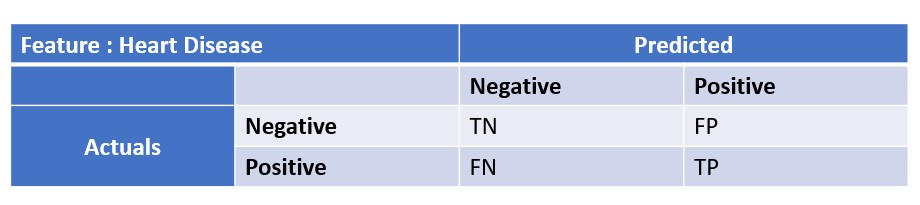

In [38]:
# Important Model Scores

# 1. Accuracy : Accuracy tells you how many times the ML model was correct overall.
#    100 Predictions, 73 are correct, accuracy is 73%

# 2. Precision : Model metric we use to select our best model when there is a high cost associated with False Positive (FP) 
#    When the costs of False Positive is high. For instance, email spam detection. 
#    In email spam detection, a false positive means that an email that is non-spam (actual negative) has been predicted as spam (predicted spam).  

# 3. Recall :  Model metric we use to select our best model when there is a high cost associated with False Negative (FN) 
#    If a fraudulent transaction (Actual Positive) is predicted as non-fraudulent (Predicted Negative)

# 4. F1-Score  :  The accuracy metric computes how many times a model made a correct prediction across the entire dataset
#    Performance measure for classification and often preferred over, for example, accuracy when data is unbalanced

#<b>-------------------------------------Setting up Models with Algorithms------------------------------------------</b>

In [39]:
# Print Current DateTime
current_date_time = now.strftime("%m/%d/%Y, %H:%M:%S")

In [40]:
models = []
models.append(['XGBClassifier',XGBClassifier(learning_rate=0.1,objective='binary:logistic',random_state=0,eval_metric='mlogloss')])
models.append(['Logistic Regression',LogisticRegression(random_state=0)])
models.append(['SVM',SVC(random_state=0)])
models.append(['KNeigbors',KNeighborsClassifier()])
#models.append(['GaussianNB',GaussianNB()])
models.append(['BernoulliNB',BernoulliNB()])
models.append(['DecisionTree',DecisionTreeClassifier(random_state=0)])
models.append(['RandomForest',RandomForestClassifier(random_state=0)])
models.append(['AdaBoostClassifier',AdaBoostClassifier()])

<b>-------------------------------------Compute Model Performance Matrix ------------------------------------------</b>

=================================Model:XGBClassifier : 05/29/2023, 11:25:21 =====================================


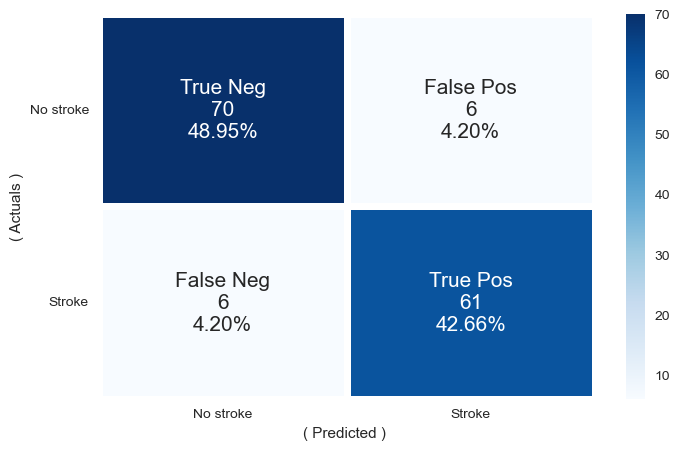

=================================Model:Logistic Regression : 05/29/2023, 11:25:21 =====================================


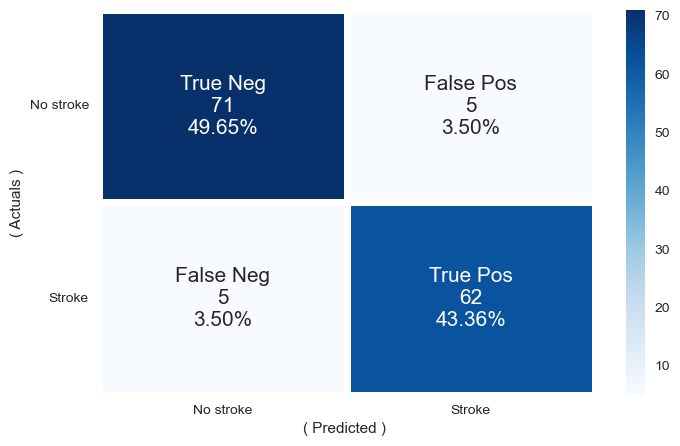

=================================Model:SVM : 05/29/2023, 11:25:21 =====================================


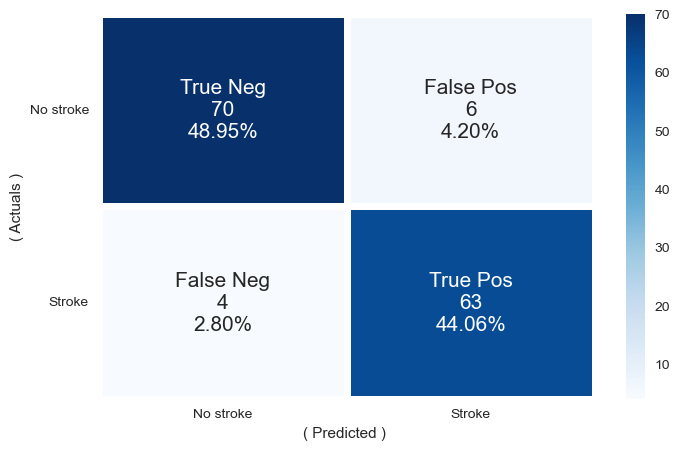

=================================Model:KNeigbors : 05/29/2023, 11:25:21 =====================================


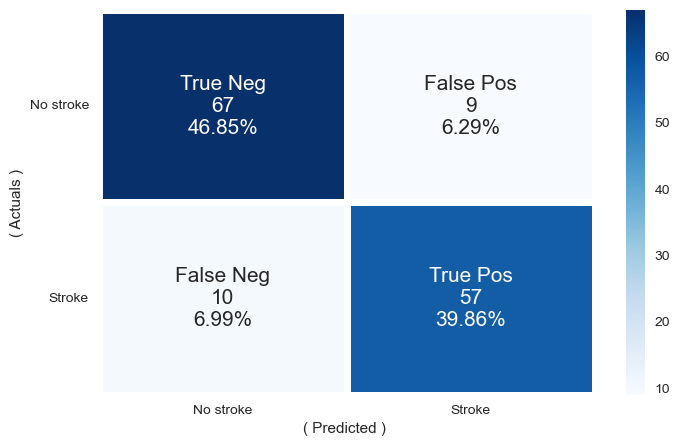

=================================Model:BernoulliNB : 05/29/2023, 11:25:21 =====================================


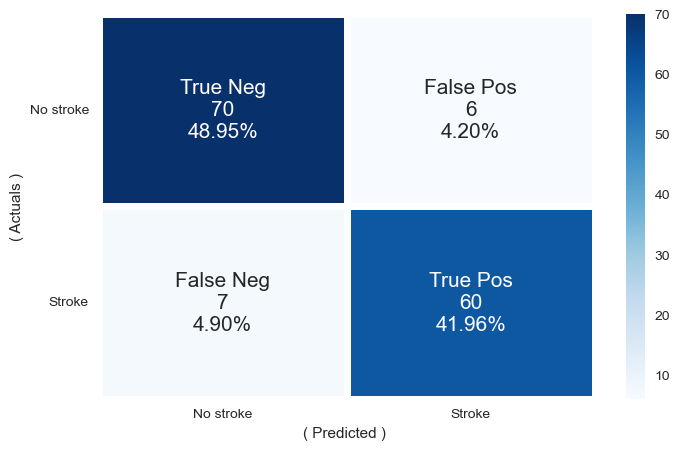

=================================Model:DecisionTree : 05/29/2023, 11:25:21 =====================================


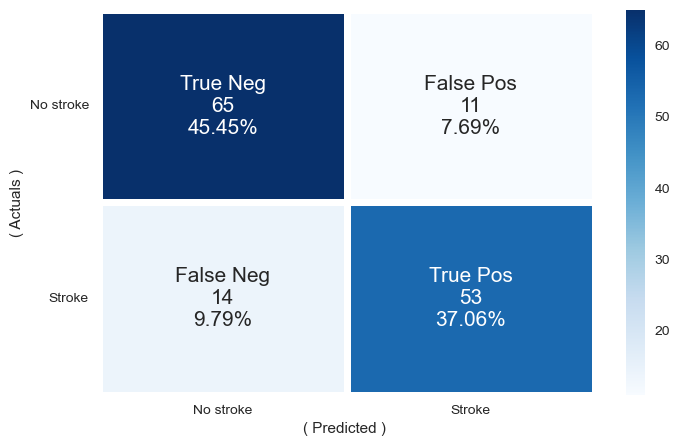

=================================Model:RandomForest : 05/29/2023, 11:25:21 =====================================


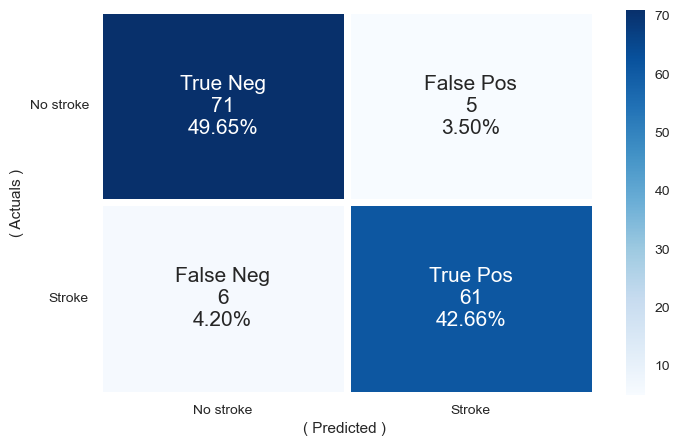

=================================Model:AdaBoostClassifier : 05/29/2023, 11:25:21 =====================================


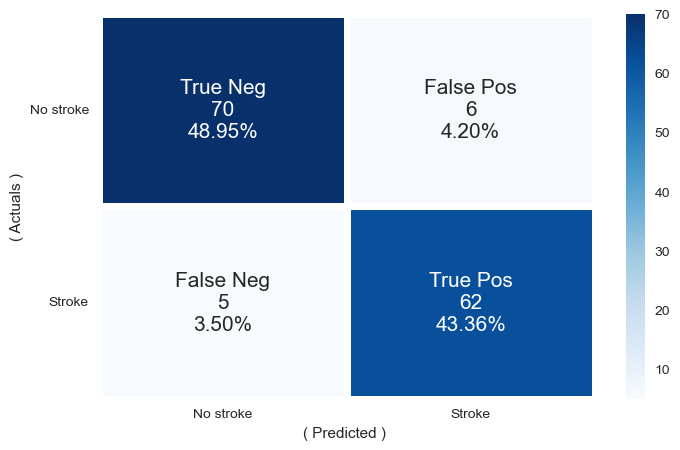

In [41]:
lst_1 = []
for m in range(len(models)):
    lst_2 = []
    model = models[m][1]
    modelName = models[m][0]
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
   
   # Commented out : accuracies = cross_val_score(estimator= model, X = X_train,y = y_train, cv=10)
    
    # Visualizing Confusion Matrix
    cm = confusion_matrix(y_test,y_pred)
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (8, 5))
    ax = sns.heatmap(cm, cmap = 'Blues', annot=labels, fmt = '', linewidths = 5, cbar = True, annot_kws = {'fontsize': 15}, 
                yticklabels = ['No stroke', 'Stroke'], xticklabels = ['No stroke', 'Stroke'])
    ax.set_xlabel('( Predicted ) ')
    ax.set_ylabel('( Actuals )');
    plt.yticks(rotation = 0)
    txt =  "=================================Model:{0} : {1} ====================================="
    print(txt.format(modelName, current_date_time))
    plt.show()

# k-fOLD Validation
    roc = roc_auc_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    lst_2.append(models[m][0])
    lst_2.append(accuracy_score(y_test,y_pred)*100)
    #lst_2.append(accuracies.mean()*100)
    #lst_2.append(accuracies.std()*100)
    #lst_2.append(roc)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(f1)
    lst_1.append(lst_2)

<b>########################################### MODEL EVALUATION & SELECTION #####################################################</b> 

In [42]:
# Model Performance Report 
df2 = pd.DataFrame(lst_1,columns=['Model','Accuracy','Precision','Recall','F1 Score'])

# Type II Errors - False Negatives Take Precedence
# High precision and high recall are desirable, but there may be a trade-off between the two metrics in some cases.
# If a Stroke (Actual Positive) is predicted as No Stroke (Predicted Negative) it can be fatal 
df2.sort_values(by=['Accuracy', 'Recall'],inplace=True,ascending=False)
df2

# Selected SVM as the Model since they have the Highest Accuracy and Precision

,Model,Accuracy,Precision,Recall,F1 Score
2,SVM,93.006993,0.913043,0.940299,0.926471
1,Logistic Regression,93.006993,0.925373,0.925373,0.925373
7,AdaBoostClassifier,92.307692,0.911765,0.925373,0.918519
6,RandomForest,92.307692,0.924242,0.910448,0.917293
0,XGBClassifier,91.608392,0.910448,0.910448,0.910448
4,BernoulliNB,90.909091,0.909091,0.895522,0.902256
3,KNeigbors,86.713287,0.863636,0.850746,0.857143
5,DecisionTree,82.517483,0.828125,0.791045,0.809160


<b>########################################### MODEL RUN #####################################################</b> 

<b>--------------------------------# Run Model from input #----------------------------------</b>

In [43]:
# Print Binned Values 
#df_bins

In [44]:
# Function to Retrieve Binned Values for External DataSources like Websites, Input Files 
def getBinnedValues(sex, exerciseangina, age, restingbp, cholestrol, maxhr, oldpeak):
    mapped_genders = {1: 'Male', 0: 'Female'}
    mapped_angina = {1: 'Y', 0: 'N'}
    binned_gender = list(filter(lambda x: mapped_genders[x] == sex, mapped_genders))[0]
    binned_angina = list(filter(lambda x: mapped_angina[x] == exerciseangina, mapped_angina))[0]
    
    #age 
    rows = df_bins.loc[ ( df_bins['feature'] == 'Age' ), ['freq', 'min', 'max', 'bin']]
    for index, row in rows.iterrows():
        if ( ( row['min'] <= float(age) )  & ( row['max'] >= float(age) ) ):
            binned_age = row['bin']
    
    #RestingBP
    binned_restingbp = -9999.00
    rows = df_bins.loc[ ( df_bins['feature'] == 'RestingBP' ), ['freq', 'min', 'max', 'bin']]
    for index, row in rows.iterrows():
        if ( ( row['min'] <= float(restingbp) )  & ( row['max'] >= float(restingbp) ) ):
            binned_restingbp = row['bin']
            
    #Cholesterol
    binned_cholestrol = -9999.00
    rows = df_bins.loc[ ( df_bins['feature'] == 'Cholesterol' ), ['freq', 'min', 'max', 'bin']]
    for index, row in rows.iterrows():
        if ( ( row['min'] <= float(cholestrol) )  & ( row['max'] >= float(cholestrol) ) ):
            binned_cholestrol = row['bin']

    #MaxHR
    binned_maxhr = -9999.00
    rows = df_bins.loc[ ( df_bins['feature'] == 'MaxHR' ), ['freq', 'min', 'max', 'bin']]
    for index, row in rows.iterrows():
        if ( ( row['min'] <= float(maxhr) )  & ( row['max'] >= float(maxhr) ) ):
            binned_maxhr = row['bin']
            
    #OldPeak
    binned_oldpeak = -9999.00
    rows = df_bins.loc[ ( df_bins['feature'] == 'Oldpeak' ), ['freq', 'min', 'max', 'bin']]
    for index, row in rows.iterrows():
        if ( ( row['min'] <= float(oldpeak) )  & ( row['max'] >= float(oldpeak) ) ):
            binned_oldpeak = row['bin']
            
    return binned_gender, binned_angina, binned_age, binned_restingbp, binned_cholestrol, binned_maxhr, binned_oldpeak

#Unit Test 
#a,b,c,d,e,f,g = getBinnedValues('Female', 'N', 55, 164, 410, 201, 1.5)
#print(a,b,c,d,e,f,g)

In [45]:
#Retreive Trained Model SVM
m=2
currentModel = models[m][1]
currentModelName = models[m][0]
print(currentModel)

SVC(random_state=0)


In [46]:
# Create Input Model, 37 Features 
# continuos_features = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]

#inputs from External Source , file or Web Page 
Sex = 'Male'
ExerciseAngina = 'Y'

Age = 59
RestingBP =  145
Cholesterol = 280
MaxHR = 147
Oldpeak = 0.9

FastingBS=0
ChestPainType_ASY=1
ChestPainType_ATA=0
ChestPainType_NAP=0
ChestPainType_TA=0
RestingECG_LVH=0
RestingECG_Normal=1
RestingECG_ST=0
ST_Slope_Down=0
ST_Slope_Flat=1
ST_Slope_Up=0

# translate into bin
binned_gender, binned_angina, binned_age, binned_restingbp, binned_cholestrol, binned_maxhr, binned_oldpeak = getBinnedValues(Sex, ExerciseAngina, Age, RestingBP, Cholesterol, MaxHR, Oldpeak)
output =  "binned_gender:{0}, binned_angina:{1}, binned_age:{2}, binned_restingbp:{3}, binned_cholestrol:{4}, binned_maxhr:{5},  binned_oldpeak:{6}"
print(output.format(binned_gender, binned_angina, binned_age, binned_restingbp, binned_cholestrol, binned_maxhr, binned_oldpeak))

#Built Input Model
inputModel = pd.DataFrame(columns=['Sex','FastingBS','ExerciseAngina','ChestPainType_ASY','ChestPainType_ATA','ChestPainType_NAP','ChestPainType_TA',
        'RestingECG_LVH','RestingECG_Normal','RestingECG_ST', 
        'ST_Slope_Down','ST_Slope_Flat','ST_Slope_Up',
        'Age_0','Age_1','Age_2','Age_3','Age_4',
        'RestingBP_0','RestingBP_1','RestingBP_2','RestingBP_3','RestingBP_4',
        'Cholesterol_0','Cholesterol_1','Cholesterol_2','Cholesterol_3','Cholesterol_4',
        'MaxHR_0','MaxHR_1','MaxHR_2','MaxHR_3','MaxHR_4',
        'Oldpeak_0','Oldpeak_1','Oldpeak_2','Oldpeak_3','Oldpeak_4'])

input = {
            'Sex': binned_gender, 
            'ExerciseAngina': binned_angina, 
            'FastingBS' : FastingBS,
            'ChestPainType_ASY':1,
            'ChestPainType_ATA':0,
            'ChestPainType_NAP':0,
            'ChestPainType_TA':0,
            'RestingECG_LVH':0,
            'RestingECG_Normal':1,
            'RestingECG_ST':0,
            'ST_Slope_Down':0,
            'ST_Slope_Flat':1,
            'ST_Slope_Up':0
        }

inputModel = inputModel.append(input, ignore_index = True)
# use of range() to define a range of values
ranges = range(5)

# iterate from i = 0 to i = 3
for i in ranges:
    if ( i == binned_age ):
        inputModel['Age_'+str(i)] = 1 
    else:
        inputModel['Age_'+str(i)] = 0
for i in ranges:
    if ( i == binned_restingbp ):
        inputModel['RestingBP_'+str(i)] = 1 
    else:
        inputModel['RestingBP_'+str(i)] = 0
for i in ranges:
    if ( i == binned_cholestrol ):
        inputModel['Cholesterol_'+str(i)] = 1 
    else:
        inputModel['Cholesterol_'+str(i)] = 0
for i in ranges:
    if ( i == binned_maxhr ):
        inputModel['MaxHR_'+str(i)] = 1 
    else:
        inputModel['MaxHR_'+str(i)] = 0
for i in ranges:
    if ( i == binned_oldpeak ):
        inputModel['Oldpeak_'+str(i)] = 1
    else:
        inputModel['Oldpeak_'+str(i)] = 0

# Output to File 
# inputModel.to_csv('input.csv', index=False )

binned_gender:1, binned_angina:1, binned_age:3, binned_restingbp:3, binned_cholestrol:1, binned_maxhr:2,  binned_oldpeak:0


In [47]:
inputModel[['ST_Slope_Flat','ExerciseAngina', 'ChestPainType_ASY', 'Sex', 'Oldpeak_1', 'Oldpeak_2', 'MaxHR_1', 'Age_3', 'FastingBS', 'Oldpeak_3', 'ST_Slope_Down', 'RestingBP_4', 'RestingBP_3', 'MaxHR_0']]

,ST_Slope_Flat,ExerciseAngina,ChestPainType_ASY,Sex,Oldpeak_1,Oldpeak_2,MaxHR_1,Age_3,FastingBS,Oldpeak_3,ST_Slope_Down,RestingBP_4,RestingBP_3,MaxHR_0
0,1,1,1,1,0,0,0,1,0,0,0,0,1,0


In [48]:
# performing predictions on the Input Model
y_target = currentModel.predict(inputModel)
output = "Heart Disease Detected!" if y_target == 1 else "No Heart Disease!"
print("----------------------Heart Disease Detection----------------------")
print(output)

----------------------Heart Disease Detection----------------------
Heart Disease Detected!


In [49]:
print("----------------------Heart Disease (Input) ----------------------")
#Age_freq =  df_bins.loc[ ( df_bins['feature'] == 'Age' ) & ( df_bins['bin'] == 2 ), ['freq'] ].values[0][0]
#RestingBP_freq =  df_bins.loc[ ( df_bins['feature'] == 'RestingBP' ) & ( df_bins['bin'] == 3 ), ['freq'] ].values[0][0]
#Cholesterol_freq =  df_bins.loc[ ( df_bins['feature'] == 'Cholesterol' ) & ( df_bins['bin'] == 1 ), ['freq'] ].values[0][0]
#MaxHR_freq =  df_bins.loc[ ( df_bins['feature'] == 'MaxHR' ) & ( df_bins['bin'] == 2 ), ['freq'] ].values[0][0]
#Oldpeak_freq =  df_bins.loc[ ( df_bins['feature'] == 'Oldpeak' ) & ( df_bins['bin'] == 0 ), ['freq']].values[0][0]

#output =  "Age:{0}, RestingBP:{1}, Cholesterol:{2}, MaxHR:{3}, Oldpeak:{4}"
#print(output.format(Age_freq, RestingBP_freq, Cholesterol_freq, MaxHR_freq, Oldpeak_freq))

----------------------Heart Disease (Input) ----------------------
